In [158]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# plt.style.use('fivethirtyeight')

In [160]:
odf = pd.read_csv("./results/beijingb_scaled/las/final.csv")
df = odf[odf["is_val_error"] == True]

In [161]:
df.head()

,is_val_error,reg,stepSize,lastKDays,kout,kin,time_ix,hy_ix,rmse,mae
0,True,Lasso,30,100,0,0,29,0,39.197114,38.326605
1,True,Lasso,30,100,0,0,29,1,38.317017,37.418484
2,True,Lasso,30,100,0,0,29,2,29.642420,28.363595
3,True,Lasso,30,100,0,0,29,3,48.017782,47.445392
4,True,Lasso,30,100,0,0,29,4,58.527414,58.101453


In [162]:
df.columns

Index(['is_val_error', 'reg', 'stepSize', 'lastKDays', 'kout', 'kin',
       'time_ix', 'hy_ix', 'rmse', 'mae'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcfced91278>,
      dtype=object)

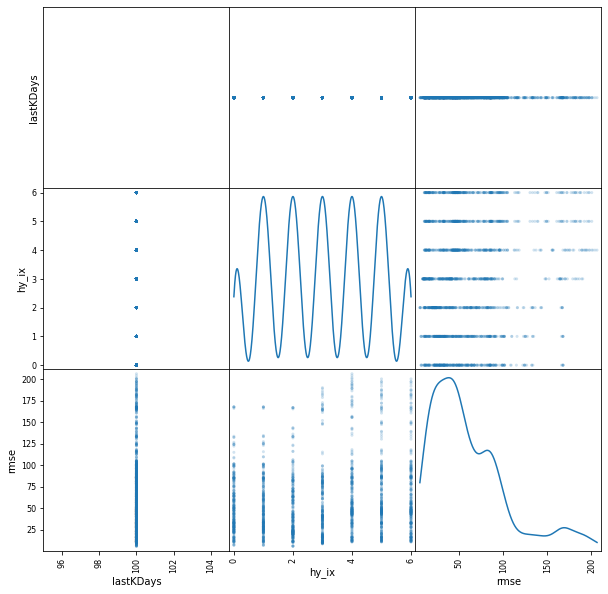

In [163]:
from pandas.plotting import scatter_matrix
new_df = df[['lastKDays', 'hy_ix', 'rmse']]
scatter_matrix(new_df, alpha=0.2, figsize=(10, 10), diagonal='kde')

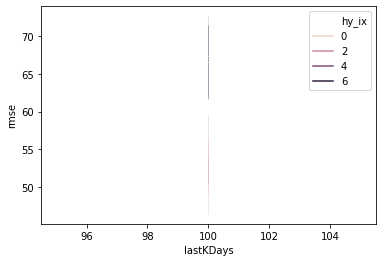

In [164]:
# trying to see what is the effect of LastKDays
# if we have a perticular set of hyperparameter set
sns.lineplot(data=df, marker=True, x = "lastKDays", y="rmse", hue="hy_ix", )

In [165]:
grped = df.groupby("lastKDays")
ks = df["lastKDays"].unique()

In [167]:
odf["is_val_error"].unique()

array([ True, False])